In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import sys
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [60]:
p = []
fa_files = []
fa_app_corr_files = []
fa_emp_corr_files = []
mask_files = []

# for fewer subjects
p = ['/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs001/ses-s1Bx2',
'/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs002/ses-s1Bx2',
'/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs005/ses-s1Bx3',
'/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs006/ses-s1Bx2',
'/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs007/ses-s1Bx2']
p.sort()

for i in range(len(p)):
    f = p[i] + '/tracto_op_corpt_1/'+p[i].split('/')[7] + '_' + p[i].split('/')[8] + '__evecs_v1.nii.gz'
    a = p[i] + '/tracto_op_lr_emp_corr_1/'+p[i].split('/')[7] + '_' + p[i].split('/')[8] + '__evecs_v1.nii.gz'
    e = p[i] + '/tracto_op_lr_appox_corr_1/'+p[i].split('/')[7] + '_' + p[i].split('/')[8] + '__evecs_v1.nii.gz'
    m = p[i] + '/tracto_op_lr_emp_corr_1/'+p[i].split('/')[7] + '_' + p[i].split('/')[8] + '__b0_mask_resampled.nii.gz'
    fa_files.append(f)
    fa_emp_corr_files.append(a)
    fa_app_corr_files.append(e)
    mask_files.append(m)

In [56]:
p = []
fa_files = []
fa_app_corr_files = []
fa_emp_corr_files = []
mask_files = []

# for fewer subjects
p = ['/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs001/ses-s1Bx2',
'/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs002/ses-s1Bx2',
'/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs005/ses-s1Bx3',
'/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs006/ses-s1Bx2',
'/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs007/ses-s1Bx2']
p.sort()

for i in range(len(p)):
    f = p[i] + '/tracto_op_corpt_1/'+p[i].split('/')[7] + '_' + p[i].split('/')[8] + '__md.nii.gz'
    a = p[i] + '/tracto_op_lr_emp_corr_1/'+p[i].split('/')[7] + '_' + p[i].split('/')[8] + '__md.nii.gz'
    e = p[i] + '/tracto_op_lr_appox_corr_1/'+p[i].split('/')[7] + '_' + p[i].split('/')[8] + '__md.nii.gz'
    m = p[i] + '/tracto_op_lr_emp_corr_1/'+p[i].split('/')[7] + '_' + p[i].split('/')[8] + '__b0_mask_resampled.nii.gz'
    fa_files.append(f)
    fa_emp_corr_files.append(a)
    fa_app_corr_files.append(e)
    mask_files.append(m)

In [4]:
sys.argv[1] = '/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs001/ses-s1Bx2/tracto_op_corpt_1/sub-cIVs001_ses-s1Bx2__md.nii.gz'
sys.argv[2] = '/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs001/ses-s1Bx2/tracto_op_lr_appox_corr_1/sub-cIVs001_ses-s1Bx2__md.nii.gz'
sys.argv[3] = '/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs001/ses-s1Bx2/tracto_op_lr_emp_corr_1/sub-cIVs001_ses-s1Bx2__md.nii.gz'

In [6]:
mask = nib.load('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/sub-cIVs001/ses-s1Bx2/prequal_dwi_cat/mask.nii.gz').get_fdata()
mask = mask.astype(int)

In [5]:
fa_corpt = nib.load(sys.argv[1]).get_fdata()
fa_approx_corr = nib.load(sys.argv[2]).get_fdata()
fa_emp_corr = nib.load(sys.argv[3]).get_fdata()

In [15]:
def angular_error(PEa, PEb, halfPi=True):
    chord = np.square(PEa[..., 0] - PEb[..., 0]) + \
            np.square(PEa[..., 1] - PEb[..., 1]) + \
            np.square(PEa[..., 2] - PEb[..., 2])
    chord = np.sqrt(chord)

    ang = 2 * np.real(np.arcsin(chord/2))

    if halfPi:
        ang[ang > (np.pi/2)] = np.pi - ang[ang > (np.pi/2)]
    return np.degrees(ang)

array([0., 1.])

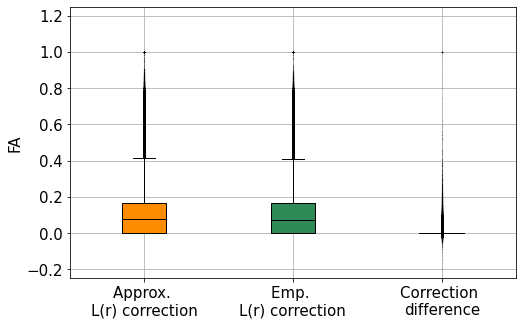

In [55]:
# for i in range(1):
i = 0
c = nib.load(fa_files[i]).get_fdata()
ac = nib.load(fa_app_corr_files[i]).get_fdata()
ec = nib.load(fa_emp_corr_files[i]).get_fdata()
mask = nib.load(mask_files[i]).get_fdata()
plt.rcParams.update({'font.size':15})
fig, ax = plt.subplots(figsize=(8,5))   
diff = ac - ec
bplot1 = plt.boxplot([ac.ravel(),ec.ravel(),diff.ravel()],patch_artist=True,flierprops={'marker': '.', 'markersize': 0.05})
plt.ylabel('FA')
plt.xticks([1,2,3],['Approx. \nL(r) correction','Emp. \nL(r) correction', 'Correction \ndifference'])
colors = ['darkorange', 'seagreen','tan']
plt.ylim((-0.25,1.25))
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot1['medians']:
    median.set_color('black')
plt.grid()
    


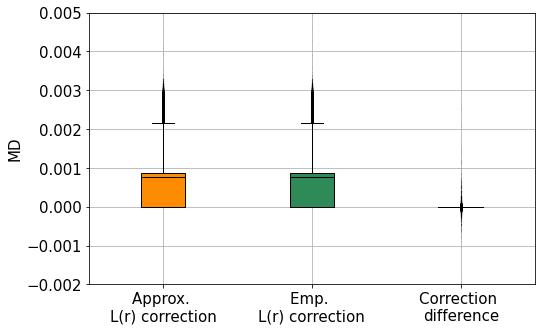

In [59]:
# for i in range(1):
i = 0
c = nib.load(fa_files[i]).get_fdata()
ac = nib.load(fa_app_corr_files[i]).get_fdata()
ec = nib.load(fa_emp_corr_files[i]).get_fdata()
mask = nib.load(mask_files[i]).get_fdata()
plt.rcParams.update({'font.size':15})
fig, ax = plt.subplots(figsize=(8,5))   
diff = ac - ec
bplot1 = plt.boxplot([ac.ravel(),ec.ravel(),diff.ravel()],patch_artist=True,flierprops={'marker': '.', 'markersize': 0.05})
plt.ylabel('MD')
plt.xticks([1,2,3],['Approx. \nL(r) correction','Emp. \nL(r) correction', 'Correction \ndifference'])
colors = ['darkorange', 'seagreen','tan']
plt.ylim((-0.002,0.005))
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot1['medians']:
    median.set_color('black')
plt.grid()

/home/local/VANDERBILT/kanakap/miniconda3/envs/gradten/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arcsin
  import sys


(-2.0, 10.0)

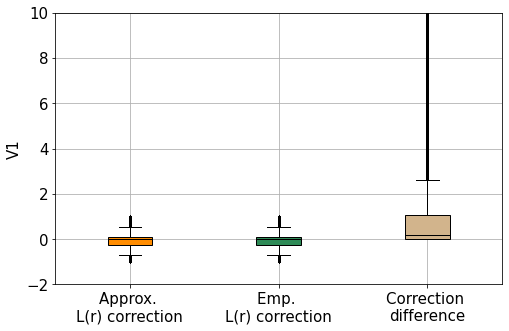

In [63]:
# for i in range(1):
i = 0
c = nib.load(fa_files[i]).get_fdata()
ac = nib.load(fa_app_corr_files[i]).get_fdata()
ec = nib.load(fa_emp_corr_files[i]).get_fdata()
mask = nib.load(mask_files[i]).get_fdata()
plt.rcParams.update({'font.size':15})
fig, ax = plt.subplots(figsize=(8,5))   
ang_error1 = angular_error(ac,ec,halfPi=True)
ang_error1[np.isnan(ang_error1)] = 0
bplot1 = plt.boxplot([ac.ravel(),ec.ravel(),ang_error1.ravel()],patch_artist=True,flierprops={'marker': '.', 'markersize': 0.05})
plt.ylabel('V1')
plt.xticks([1,2,3],['Approx. \nL(r) correction','Emp. \nL(r) correction', 'Correction \ndifference'])
colors = ['darkorange', 'seagreen','tan']
plt.ylim((-0.002,0.005))
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot1['medians']:
    median.set_color('black')
plt.grid()
plt.ylim((-2,10))

In [2]:
mod_corpt = {0: [0.32847461077629975],
 1: [0.3915364730322952],
 2: [0.38281480157478787],
 3: [0.3336085749114066],
 4: [0.40758800882846474]}
mod_emp = {0: [ 0.32420310807701774],
 1: [0.39167012367604587],
 2: [0.37810477592281566],
 3: [0.3316866378001649],
 4: [0.40798401853467703]}
mod_approx = {0: [ 0.3240952296147515],
 1: [ 0.39326073849128],
 2: [0.3815914229886617],
 3: [0.3358924508664112],
 4: [ 0.40975873572607513]}

In [26]:
# ge
mod_corpt = {0: [0.06745144661115324],
 1: [0.06343341027097728],
 2: [0.04705660576329484],
 3: [0.05867159218096497],
 4: [0.05839742901487686]}
mod_emp = {0: [0.0640363727084702],
 1: [0.06552946522917749],
 2: [0.048090592461306945],
 3: [0.05568365398771956],
 4: [0.052990838510007424]}
mod_approx = {0: [0.0653933553908156],
 1: [0.06455001095503801],
 2: [0.048162686180421466],
 3: [0.05836062231079837],
 4: [0.061121681595353125]}

In [29]:
# cpl
mod_corpt = {0: [94.28363963182935],
 1: [95.38611802440262],
 2: [92.94712930271473],
 3: [92.93767142668722],
 4: [91.77763764686651]}
mod_emp = {0: [94.07639368470873],
 1: [ 95.1918998772296],
 2: [ 92.90616521128707],
 3: [ 92.76089758359656],
 4: [ 92.23919467964448]}
mod_approx = {0: [93.00286502794486],
 1: [ 95.18771757355957],
 2: [ 93.13544899118729],
 3: [ 92.00063750156119],
 4: [92.1397663817921]}

In [31]:
a =pd.DataFrame.from_dict(mod_corpt)
a = a.transpose()
a = a.assign(x='Uncorrected')
b =pd.DataFrame.from_dict(mod_emp)
b = b.transpose()
b = b.assign(x='Emp. L(r) correction')
c =pd.DataFrame.from_dict(mod_approx)
c = c.transpose()
c = c.assign(x='Approx. L(r) correction')

cat = pd.concat([a,c,b])


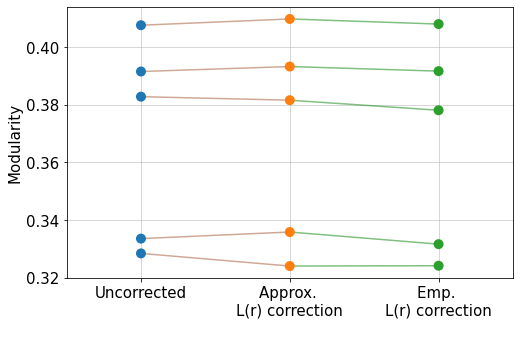

In [23]:
import seaborn
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size':15})
fig, ax = plt.subplots(figsize=(8,5))
seaborn.swarmplot(x="x",
                  y=0,
                  data=cat, size=10)
plt.ylabel('Modularity')
plt.xticks([0,1,2],['Uncorrected','Approx. \nL(r) correction','Emp. \nL(r) correction'])
plt.xlabel(' ')

idx0 = 0
idx1 = 1
idx2 = 2
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
sort_idxs1 = np.argsort([i[0] for i in mod_corpt.values()])
sort_idxs2 = np.argsort([i[0] for i in mod_approx.values()])
sort_idxs3 = np.argsort([i[0] for i in mod_emp.values()])
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
locs3_sorted = locs3[sort_idxs3.argsort()][sort_idxs2]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    ax.plot(x, y, color="sienna", alpha=0.5, markersize=20)

for i in range(locs2.shape[0]):
    y = [locs2[i, 0], locs3_sorted[i, 0]]
    z = [locs2[i, 1], locs3_sorted[i, 1]]
    ax.plot(y, z, color="green", alpha=0.5, markersize=20)
ax.grid(True,linewidth=0.5)

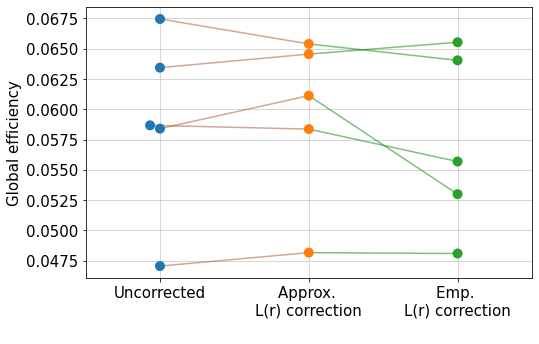

In [28]:
import seaborn
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size':15})
fig, ax = plt.subplots(figsize=(8,5))
seaborn.swarmplot(x="x",
                  y=0,
                  data=cat, size=10)
plt.ylabel('Global efficiency')
plt.xticks([0,1,2],['Uncorrected','Approx. \nL(r) correction','Emp. \nL(r) correction'])
plt.xlabel(' ')

idx0 = 0
idx1 = 1
idx2 = 2
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
sort_idxs1 = np.argsort([i[0] for i in mod_corpt.values()])
sort_idxs2 = np.argsort([i[0] for i in mod_approx.values()])
sort_idxs3 = np.argsort([i[0] for i in mod_emp.values()])
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
locs3_sorted = locs3[sort_idxs3.argsort()][sort_idxs2]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    ax.plot(x, y, color="sienna", alpha=0.5, markersize=20)

for i in range(locs2.shape[0]):
    y = [locs2[i, 0], locs3_sorted[i, 0]]
    z = [locs2[i, 1], locs3_sorted[i, 1]]
    ax.plot(y, z, color="green", alpha=0.5, markersize=20)
ax.grid(True,linewidth=0.5)

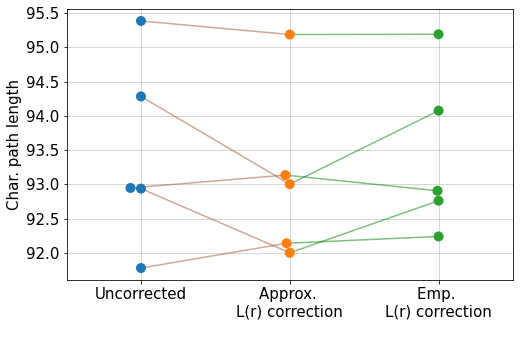

In [32]:
import seaborn
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size':15})
fig, ax = plt.subplots(figsize=(8,5))
seaborn.swarmplot(x="x",
                  y=0,
                  data=cat, size=10)
plt.ylabel('Char. path length')
plt.xticks([0,1,2],['Uncorrected','Approx. \nL(r) correction','Emp. \nL(r) correction'])
plt.xlabel(' ')

idx0 = 0
idx1 = 1
idx2 = 2
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
sort_idxs1 = np.argsort([i[0] for i in mod_corpt.values()])
sort_idxs2 = np.argsort([i[0] for i in mod_approx.values()])
sort_idxs3 = np.argsort([i[0] for i in mod_emp.values()])
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
locs3_sorted = locs3[sort_idxs3.argsort()][sort_idxs2]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    ax.plot(x, y, color="sienna", alpha=0.5, markersize=20)

for i in range(locs2.shape[0]):
    y = [locs2[i, 0], locs3_sorted[i, 0]]
    z = [locs2[i, 1], locs3_sorted[i, 1]]
    ax.plot(y, z, color="green", alpha=0.5, markersize=20)
ax.grid(True,linewidth=0.5)

In [35]:
# volume # FAT_R
mod_corpt = {0: [21172.0], 1: [19218.0], 2: [23243.0], 3: [22732.0], 4: [21419.0]}
mod_emp = {0: [5568.0], 1: [19093.0], 2: [20256.0], 3: [14590.0], 4: [18224.0]}
mod_approx = {0: [9011.0], 1: [8575.0], 2: [17165.0], 3: [22698.0], 4: [20380.0]}

In [38]:
# mean_length # FAT_R
mod_corpt = {0: [61.65615978488069],
 1: [64.36575118550417],
 2: [61.68306505706552],
 3: [67.21748501858875],
 4: [62.17983356116329]}
mod_emp = {0: [59.832544808644386],
 1: [62.42894728995573],
 2: [60.93704114206582],
 3: [65.92529989777141],
 4: [63.44235056412757]}
mod_approx = {0: [76.17963453586144],
 1: [61.63028146968304],
 2: [61.598129248578815],
 3: [66.5767373973115],
 4: [61.34318770999698]}

In [40]:
a =pd.DataFrame.from_dict(mod_corpt)
a = a.transpose()
a = a.assign(x='Uncorrected')
b =pd.DataFrame.from_dict(mod_emp)
b = b.transpose()
b = b.assign(x='Emp. L(r) correction')
c =pd.DataFrame.from_dict(mod_approx)
c = c.transpose()
c = c.assign(x='Approx. L(r) correction')

cat = pd.concat([a,c,b])


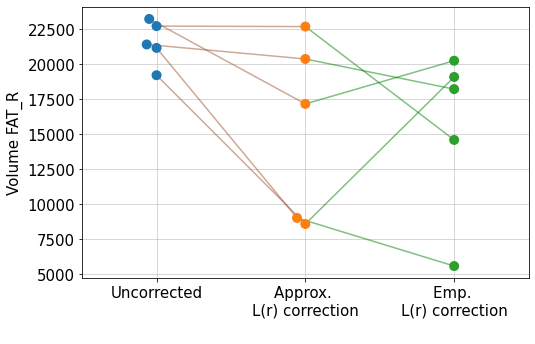

In [37]:
import seaborn
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size':15})
fig, ax = plt.subplots(figsize=(8,5))
seaborn.swarmplot(x="x",
                  y=0,
                  data=cat, size=10)
plt.ylabel('Volume FAT_R')
plt.xticks([0,1,2],['Uncorrected','Approx. \nL(r) correction','Emp. \nL(r) correction'])
plt.xlabel(' ')

idx0 = 0
idx1 = 1
idx2 = 2
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
sort_idxs1 = np.argsort([i[0] for i in mod_corpt.values()])
sort_idxs2 = np.argsort([i[0] for i in mod_approx.values()])
sort_idxs3 = np.argsort([i[0] for i in mod_emp.values()])
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
locs3_sorted = locs3[sort_idxs3.argsort()][sort_idxs2]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    ax.plot(x, y, color="sienna", alpha=0.5, markersize=20)

for i in range(locs2.shape[0]):
    y = [locs2[i, 0], locs3_sorted[i, 0]]
    z = [locs2[i, 1], locs3_sorted[i, 1]]
    ax.plot(y, z, color="green", alpha=0.5, markersize=20)
ax.grid(True,linewidth=0.5)

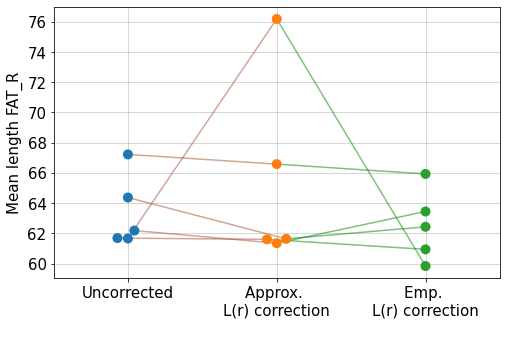

In [41]:
import seaborn
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size':15})
fig, ax = plt.subplots(figsize=(8,5))
seaborn.swarmplot(x="x",
                  y=0,
                  data=cat, size=10)
plt.ylabel('Mean length FAT_R')
plt.xticks([0,1,2],['Uncorrected','Approx. \nL(r) correction','Emp. \nL(r) correction'])
plt.xlabel(' ')

idx0 = 0
idx1 = 1
idx2 = 2
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
sort_idxs1 = np.argsort([i[0] for i in mod_corpt.values()])
sort_idxs2 = np.argsort([i[0] for i in mod_approx.values()])
sort_idxs3 = np.argsort([i[0] for i in mod_emp.values()])
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
locs3_sorted = locs3[sort_idxs3.argsort()][sort_idxs2]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    ax.plot(x, y, color="sienna", alpha=0.5, markersize=20)

for i in range(locs2.shape[0]):
    y = [locs2[i, 0], locs3_sorted[i, 0]]
    z = [locs2[i, 1], locs3_sorted[i, 1]]
    ax.plot(y, z, color="green", alpha=0.5, markersize=20)
ax.grid(True,linewidth=0.5)

In [64]:
p = ['sub-cIVs001/ses-s1Bx2/',
'sub-cIVs002/ses-s1Bx2/',
'sub-cIVs005/ses-s1Bx3/',
'sub-cIVs006/ses-s1Bx2/',
'sub-cIVs007/ses-s1Bx2/']
p.sort()    
rootpath = '/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/'

d = {}
for i in range(len(p)):
    a = [rootpath +'/'+ p[i]+'/tracto_op_corpt_1/connectivity_matrices/', rootpath +'/'+ p[i]+'/tracto_op_lr_appox_corr_1/connectivity_matrices/', rootpath +'/'+ p[i]+'/tracto_op_lr_emp_corr_1/connectivity_matrices/']
    d[i] = a

In [65]:
d

{0: ['/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids//sub-cIVs001/ses-s1Bx2//tracto_op_corpt_1/connectivity_matrices/',
  '/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids//sub-cIVs001/ses-s1Bx2//tracto_op_lr_appox_corr_1/connectivity_matrices/',
  '/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids//sub-cIVs001/ses-s1Bx2//tracto_op_lr_emp_corr_1/connectivity_matrices/'],
 1: ['/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids//sub-cIVs002/ses-s1Bx2//tracto_op_corpt_1/connectivity_matrices/',
  '/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids//sub-cIVs002/ses-s1Bx2//tracto_op_lr_appox_corr_1/connectivity_matrices/',
  '/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids//sub-cIVs002/ses-s1Bx2//tracto_op_lr_emp_corr_1/connectivity_matrices/'],
 2: ['/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids//sub-cIVs005/ses-s1Bx3//tracto_op_corpt_1/connectivity_matrices/',
  '/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids//sub-cIVs005/ses-s1Bx3//tracto_op_lr_appox_corr_1/connectivity_matrices/',
 

In [66]:
import os

IndexError: index 3 is out of bounds for axis 1 with size 3

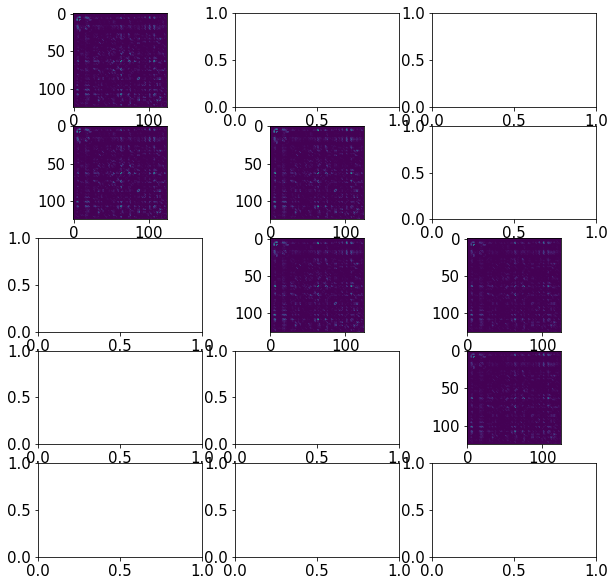

In [79]:
plt.rcParams.update({'font.size':15})
fig, ax = plt.subplots(5,3,figsize=(10,10))
for i in d:
    for f in os.listdir(d[i][0]):
        if f.endswith('__sc.npy'):
            tot = d[i][0] + f 
            # ax[].subplot(5,i+1,1)
            c = np.load(tot)
            ax[i,i].imshow(c)

    for l in os.listdir(d[i][1]):
        if l.endswith('__sc.npy'):
            tot1 = d[i][1]  + l
            # plt.subplot(5,i+1,2)
            ac = np.load(tot)
            ax[i+1,i].imshow(ac)

    for k in os.listdir(d[i][2]):
        if k.endswith('__sc.npy'):
            tot2 = d[i][2]  + k
            # plt.subplot(5,i+1,3)
            ec = np.load(tot)
            ax[i+1,i].imshow(ec)

In [73]:
c.shape

(125, 125)